# HW1

## question 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, transform, exposure, filters, feature, color, data
import scipy.ndimage as ndi
import os

In [4]:
img = data.astronaut()
print(img.shape)
print(type(img))
print(type(img[0,0,0]))

(512, 512, 3)
<class 'numpy.ndarray'>
<class 'numpy.uint8'>


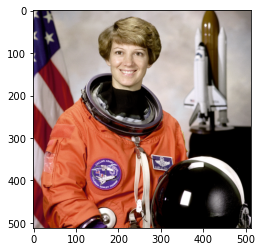

In [5]:
plt.imshow(img)

(-0.5, 511.5, 511.5, -0.5)

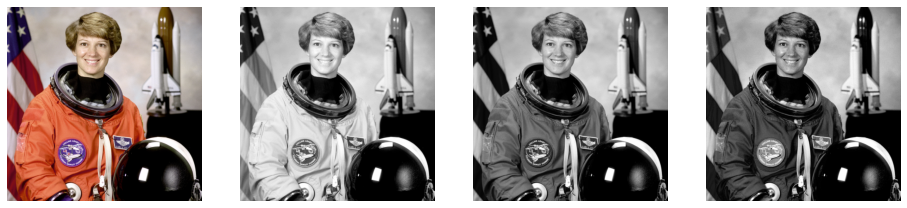

In [6]:
fig, (whole, r, g, b) = plt.subplots(ncols=4, figsize=(16, 16))

whole.imshow(img)
whole.axis('off')

r.imshow(img[:,:,0], cmap='gray')
r.axis('off')

g.imshow(img[:,:,1], cmap='gray')
g.axis('off')

b.imshow(img[:,:,2], cmap='gray')
b.axis('off')

(-0.5, 511.5, 511.5, -0.5)

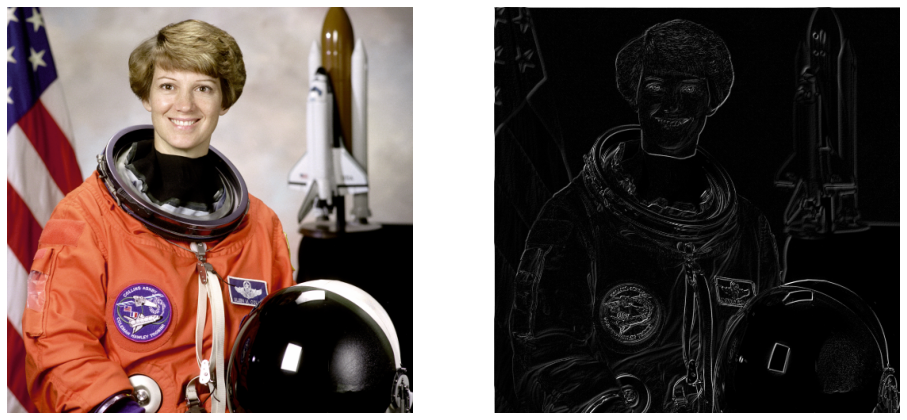

In [8]:
#Horizontal and Vertical Gradients
def img_process(image):
    image = np.float32(image)
    filt1 = np.array([[1,0],[0,-1]])
    filt2 = np.matrix.transpose(filt1)

    out1 = ndi.correlate(image,filt1,mode='constant')
    out2 = ndi.correlate(image,filt2,mode='constant')
    epsilon = 0.000001
    
    m = np.sqrt(out1**2 + out2**2)

    return m

final = img_process(img[:,:,0]) + img_process(img[:,:,1]) + img_process(img[:,:,2])
fig,(initial,result)= plt.subplots(ncols=2, figsize=(16, 8))
initial.imshow(img)
initial.axis('off')
result.imshow(final, cmap='gray')
result.axis('off')

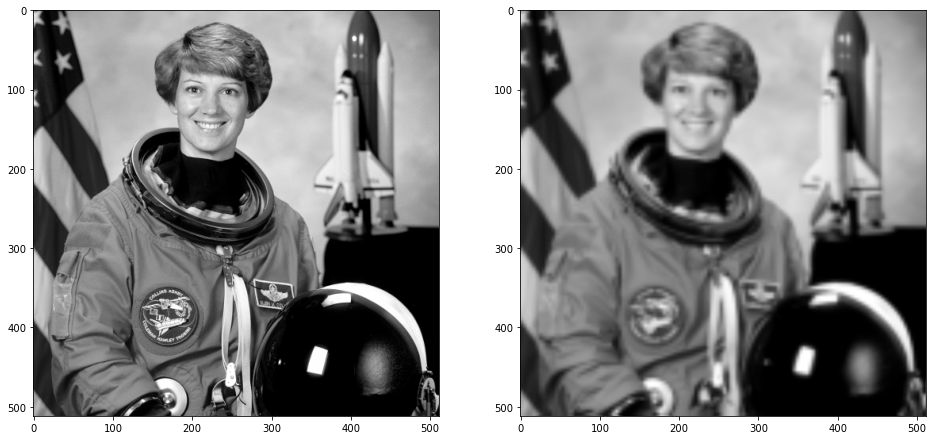

In [76]:
from skimage.transform import rescale
gray = color.rgb2gray(data.astronaut())
img_rescaled = rescale(gray, 0.25)
img_rescaled = rescale(img_rescaled, 4)

fig,(initial, rescaled_img)= plt.subplots(ncols=2, figsize=(16, 8))
initial.imshow(gray, cmap="gray")
rescaled_img.imshow(img_rescaled, cmap="gray")

## question 2

In [84]:
path = r'C:\Users\ethan\Desktop\CS450\jpg'
imagelist = os.listdir(path)
len(imagelist)

8189

In [85]:
# This is to eliminate the 'Thumbs.db' filename from the list
if imagelist[-1]=='Thumbs.db':
    imagelist = imagelist[:-1]
len(imagelist)

8189

In [ ]:
def imNormalize(image):
    if len(image.shape)==2:
        r = image
        g = image
        b = image
    else:
        r = image[:,:,0]
        g = image[:,:,1]
        b = image[:,:,2]
    
    r = r - r.min()
    r = r / r.max()
    r = np.uint8(r * 255)
    
    g = g - g.min()
    g = g / g.max()
    g = np.uint8(g * 255)
    
    b = b - b.min()
    b = b / b.max()
    b = np.uint8(b * 255)
    
    return np.stack((r,g,b),axis=2) 


def colorHistogram(image, color_type):
    if color_type == "RGB":
        image = imNormalize(image)
    else:
        image = color.rgb2hsv(image)
    
    h1 = exposure.histogram(image[:,:,0])
    h2 = exposure.histogram(image[:,:,1])
    h3 = exposure.histogram(image[:,:,2])
    h = np.concatenate((h1[0],h2[0],h3[0]), axis = None)
    h = h / (image.shape[0]*image.shape[1])
    return h

def euclideanDistance(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sqrt(np.sum((a-b)**2))

def manhattanDistance(a,b):
    a = np.array(a)
    b = np.array(b)
    return np.sum(abs(a-b))

Processing 8189 of 8189

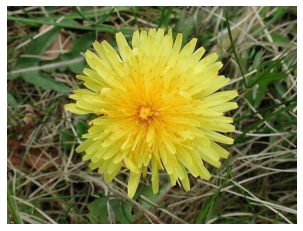

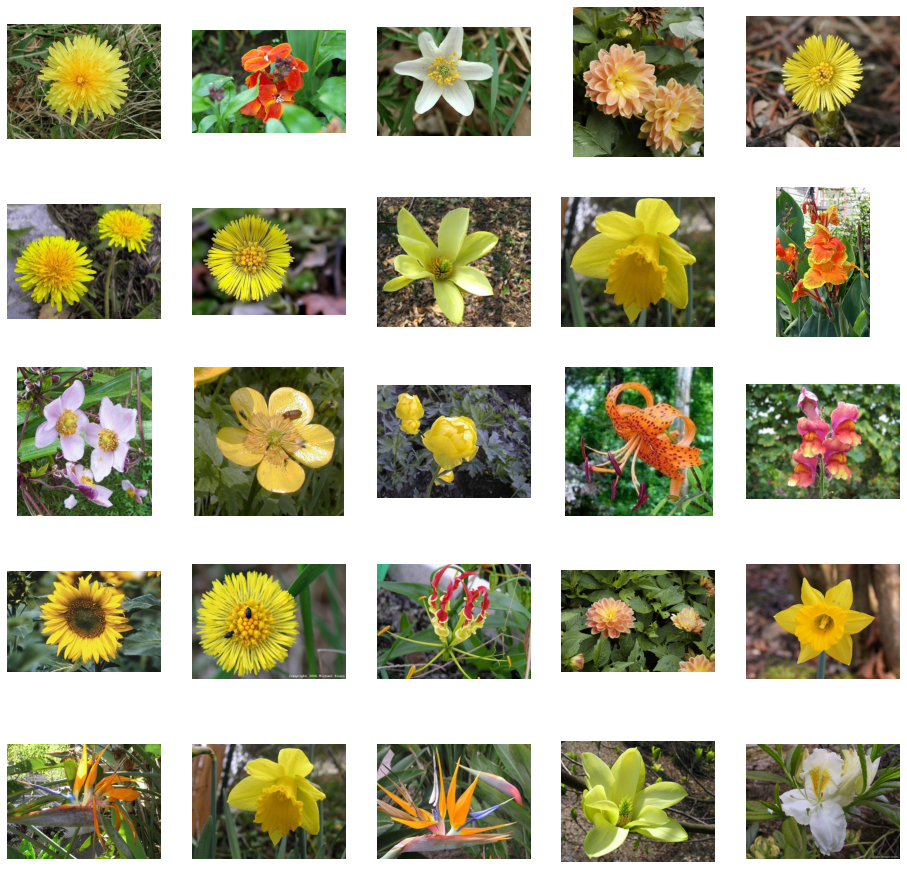

In [106]:
def retrieval(distance_process, color_type):
    featuresize = 768
    features = np.zeros((len(imagelist),featuresize))
    for i in range(len(imagelist)):
        image = io.imread(path + '/' + imagelist[i])
        features[i,:] = colorHistogram(image, color_type)
        line = '\rProcessing '+ str(i+1) + ' of '+ str(len(imagelist))
        print(line, end='')

    querynum = np.random.randint(len(imagelist))
    queryimage = io.imread(path + '/' + imagelist[querynum])
    plt.imshow(queryimage)
    plt.axis('off')

    distances = np.zeros(len(imagelist))
    if distance_process == "manhattan":
        for i in range(len(imagelist)):
            distances[i] = manhattanDistance(features[querynum,:],features[i,:])
            line = '\rProcessing '+ str(i+1) + ' of '+ str(len(imagelist))
            print(line, end='')
    else: 
        for i in range(len(imagelist)):
            distances[i] = euclideanDistance(features[querynum,:],features[i,:])
            line = '\rProcessing '+ str(i+1) + ' of '+ str(len(imagelist))
            print(line, end='')

    order = np.argsort(distances)
    order

    fig = plt.figure(figsize=[16,16])
    rows = 5
    cols = 5
    for i in range(rows*cols):
        image = io.imread(path + '/' + imagelist[order[i]])
        fig.add_subplot(rows, cols, i+1)
        plt.imshow(image)
        plt.axis('off')

    plt.show()

retrieval("manhattan", "RGB")

In [ ]:
retrieval("manhattan", "HSV")

In [ ]:
retrieval("euclidean", "RGB")

In [ ]:
retrieval("manhattan", "HSV")